Some basic commands

In [69]:
# f: formatted string
name = 'sl-s'
age = 2
f"{name.split('l')[0]} is {age} years old"


's is 2 years old'

In [2]:
# path exists
# work for both folder and files
from pathlib import Path
path = Path('./data/')
path_df1 = Path('./data/Results_01.csv')
path.exists(),path_df1.exists()

(True, True)

In [81]:
# index
import pandas as pd
df1 = pd.read_csv('./data/Results_01.csv',index_col=0)
# the original index will be converted into one column
df2 = df1.reset_index()

df2.dtypes

              int64
Label        object
Area          int64
Perim.      float64
Circ.       float64
AR          float64
Round       float64
Solidity    float64
dtype: object

In [6]:
# plotting
# simple histogram
# ax = df1['Area'].plot.hist(bins=20, edgecolor='black')
# ax.set_ylabel('Occurrence')
# ax.set_xlabel('Area')
# ax.set_title('Histogram of Area')

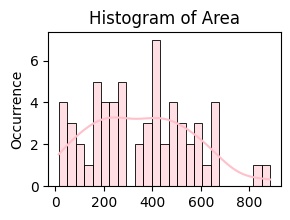

In [5]:
# plotting seaborn
# set x,y label

import matplotlib.pyplot as plt
import seaborn as sns
# reset theme
sns.reset_defaults()

plt.figure(figsize=(3,2))
sns.histplot(data=df1, x='Area', kde=True, bins=25,color='pink')
plt.ylabel('Occurrence')
plt.xlabel(None)
plt.title('Histogram of Area')
plt.show()


In [30]:
# concatenate
df1 = pd.read_csv('./data/Results_01.csv')
df2 = pd.read_csv('./data/Results_02.csv')
print(df1.shape,df2.shape)

df1['df'] = '01'
df2['df'] = '02'

merge = pd.concat([df1,df2],ignore_index=True)
merge.drop(" ", axis=1, inplace=True)
merge.sample(5)

(61, 8) (64, 8)


,Label,Area,Perim.,Circ.,AR,Round,Solidity,df
81,blobs.gif,159,46.28427,0.93270,1.22497,0.81634,0.92982,02
75,blobs.gif,448,78.42641,0.91530,1.20734,0.82827,0.94715,02
106,blobs.gif,652,94.42641,0.91890,1.11493,0.89692,0.96165,02
4,blobs.gif,477,86.04163,0.80968,1.56805,0.63773,0.96657,01
71,blobs.gif,501,82.66905,0.92122,1.07476,0.93044,0.94797,02


The mean value of Area for Student 1 is: 355.475.
The mean value of Area for Student 2 is: 347.547.


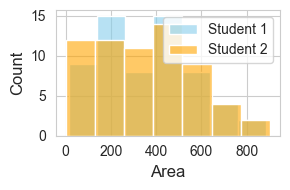

In [39]:
# distribution plot

val = df1["Area"].mean()
print(f"The mean value of Area for Student 1 is: {val:.3f}.")

val = df2["Area"].mean()
print(f"The mean value of Area for Student 2 is: {val:.3f}.")

# Set the style for seaborn
sns.set_style("whitegrid")

# Create the figure and axis
plt.figure(figsize=(3,2))

# Create the combined histogram
sns.histplot(data=df1, x="Area", color="skyblue", label="Student 1", kde=False, alpha=0.6)
sns.histplot(data=df2, x="Area", color="orange", label="Student 2", kde=False, alpha=0.6)

# Customize the plot
# plt.title("Distribution of Area for Student 1 and Student 2", fontsize=16)
plt.xlabel("Area", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Add legend
plt.legend()

# Adjust layout and display the plot
plt.tight_layout()

plt.show()

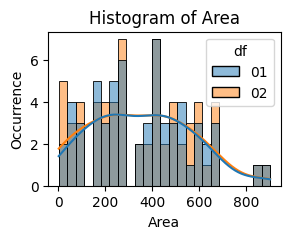

In [37]:
# distribution plot
# sns

sns.reset_defaults()
plt.figure(figsize=(3,2))
sns.histplot(data=merge, x='Area', kde=True, bins=25, hue='df')
plt.ylabel('Occurrence')
# plt.xlabel(None)
plt.title('Histogram of Area')
plt.show()


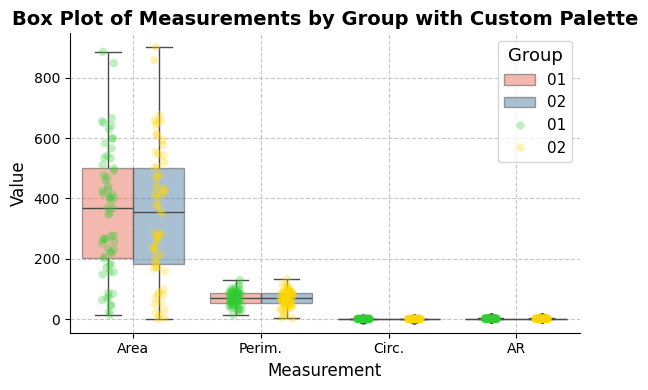

In [74]:
# box plot
# sns

# need to be long form
long_form = pd.melt(merge, id_vars=['df'], value_vars=['Area', 'Perim.', 'Circ.', 'AR'], 
                    var_name='Measurement', value_name='Value')

# Reset Seaborn to default settings
sns.reset_defaults()

# Custom color palette
custom_palette = ['#FF6347', '#4682B4', '#32CD32', '#FFD700']

plt.figure(figsize=(6, 4))
# Create a box plot
sns.boxplot(x='Measurement', y='Value', hue='df', data=long_form, palette=custom_palette[0:2], 
            dodge=True, boxprops=dict(alpha=0.5))  # Set alpha for box plot transparency

# Overlay the scatter plot
sns.stripplot(x='Measurement', y='Value', hue='df', data=long_form, palette=custom_palette[2:4],
              dodge=True, marker='o', edgecolor='w', size=6, alpha=0.3)

# Improve the aesthetics
plt.ylabel('Value', fontsize=12)
plt.xlabel('Measurement', fontsize=12)
plt.title('Box Plot of Measurements by Group with Custom Palette', fontsize=14, weight='bold')
plt.legend(title='Group', title_fontsize='13', fontsize='11')

# Enhance grid lines and ticks
sns.despine()  # Remove top and right spines
plt.grid(True, linestyle='--', alpha=0.7)  # Add grid lines with some transparency

# Show the plot
plt.tight_layout()  # Adjust layout to fit all elements
plt.show()

In [80]:
# stats

from scipy import stats as stats


Area_s1=merge.query("df == '01'")['Area']
Area_s2=merge.query("df == '02'")['Area']

# homogeneity
print(stats.levene(Area_s1, Area_s2))

# Shapiro-Wilk test for normality
print(stats.shapiro(Area_s1))
print(stats.shapiro(Area_s2))

# Independent t-test
print(stats.ttest_ind(Area_s1, Area_s2))

LeveneResult(statistic=np.float64(0.1985044133097972), pvalue=np.float64(0.65671395315861))
ShapiroResult(statistic=np.float64(0.9708005068493674), pvalue=np.float64(0.15260880873570404))
ShapiroResult(statistic=np.float64(0.9699967276382352), pvalue=np.float64(0.12092209473947735))
TtestResult(statistic=np.float64(0.20792518265523485), pvalue=np.float64(0.8356312727307184), df=np.float64(123.0))


In [ ]:
# book_07
# confidence interval